# **Image Retrieval Project Using ViT Model**
Download the dataset [here](https://drive.google.com/file/d/1Q0quEfLdfBYv9pJ8LJtmCGTizKr2jG-Z/view?usp=sharing)

0. Prepare the dataset

In [ ]:
!unzip image_retrieval_dataset.zip
!rm -rf sample_data
!rm image_retrieval_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_mr/5415.jpg      
  inflating: images_mr/5416.jpg      
  inflating: images_mr/5417.jpg      
  inflating: images_mr/5418.jpg      
  inflating: images_mr/5419.jpg      
  inflating: images_mr/542.jpg       
  inflating: images_mr/5420.jpg      
  inflating: images_mr/5421.jpg      
  inflating: images_mr/5422.jpg      
  inflating: images_mr/5423.jpg      
  inflating: images_mr/5424.jpg      
  inflating: images_mr/5425.jpg      
  inflating: images_mr/5426.jpg      
  inflating: images_mr/5427.jpg      
  inflating: images_mr/5428.jpg      
  inflating: images_mr/5429.jpg      
  inflating: images_mr/543.jpg       
  inflating: images_mr/5430.jpg      
  inflating: images_mr/5431.jpg      
  inflating: images_mr/5432.jpg      
  inflating: images_mr/5433.jpg      
  inflating: images_mr/5434.jpg      
  inflating: images_mr/5435.jpg      
  inflating: images_mr/5436.jpg      
  inflating: images_mr/5437.jpg      

1. Import libraries

In [ ]:
!pip install transformers==4.31.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from transformers import ViTImageProcessor, ViTForImageClassification

2. Read the dataset

In [ ]:
dataset_dir = "images_mr"
image_filenames = os.listdir(dataset_dir)[:500] # You can expand the number of images if your hardware allows.
src_images = []

for filename in image_filenames:
  filepath = os.path.join(dataset_dir, filename)

  image = cv2.imread(filepath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  src_images.append(image)

3. Declaring the ViT model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224").to(device)

4. Data preprocessing

In [ ]:
def preprocessing(images):
  inputs = processor(images, return_tensors="pt").to(device)

  with torch.no_grad():
    output = model(
        **inputs,
        output_hidden_states=True
    ).hidden_states[-1][:, 0, :].detach().cpu().numpy()

  return output

In [ ]:
preprocessed_src_images = preprocessing(src_images)

In [ ]:
def preprocessing(images):
  inputs = processor(images, return_tensors="pt").to(device)

  with torch.no_grad():
    output =len( model(
        **inputs,
        output_hidden_states=True
    ).hidden_states)

  return len(output)

5. Evaluation metrics

In [ ]:
def cosine_similarity(query_vector, src_vectors):
  query_norm = np.linalg.norm(query_vector)
  normalized_query = query_vector / query_norm
  src_norms = np.linalg.norm(src_vectors, axis=1)
  normalized_src = src_vectors / src_norms[:, np.newaxis]

  cosine_similarity = np.dot(normalized_src, normalized_query)

  return cosine_similarity

6. Defining rank function

In [ ]:
def ranking(preprocessed_query_image, preprocessed_src_images, top_k=10):
  scores = cosine_similarity(preprocessed_query_image, preprocessed_src_images)

  ranked_list = np.argsort(scores)[::-1][:top_k]
  scores = scores[ranked_list]

  return ranked_list, scores

7. Retrieving images

Query Image


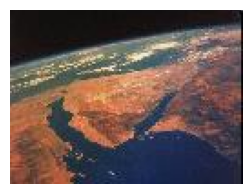

Top 10 results


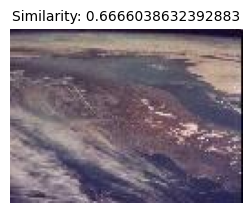

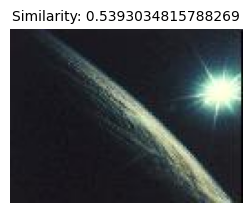

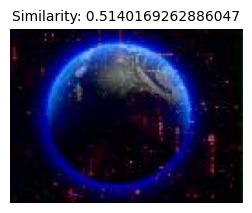

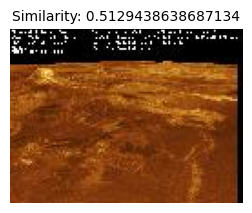

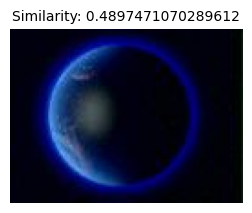

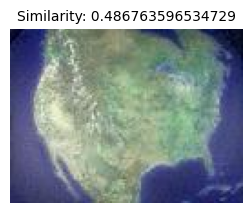

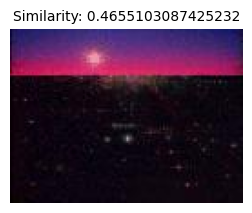

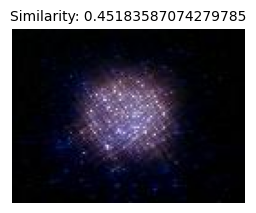

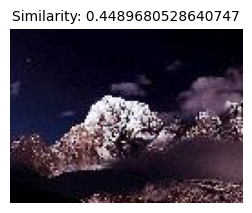

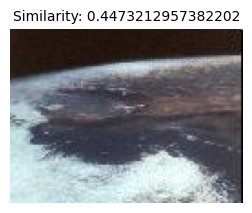

In [ ]:
query_image_paths = ['images_mr/615.jpg']
top_k = 10

for query_image_path in query_image_paths:
  query_image = cv2.imread(query_image_path, 1)
  query_image = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
  preprocessed_query_image = preprocessing(query_image).squeeze(0)

  ranked_list, scores = ranking(
      preprocessed_query_image,
      preprocessed_src_images,
      top_k
  )

  print('Query Image')
  plt.figure(figsize=(3,3))
  plt.imshow(query_image)
  plt.axis('off')
  plt.show()
  print(f'Top {top_k} results')
  for idx in range(len(ranked_list)):
    src_image_idx = ranked_list[idx]
    similarity_score = scores[idx]
    plt.figure(figsize=(3,3))
    plt.imshow(src_images[src_image_idx])
    plt.title(f'Similarity: {similarity_score}', fontsize=10)
    plt.axis('off')
    plt.show()